In [114]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
# display settings

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style = "whitegrid")

In [116]:
# load the cleaned data

data = pd.read_csv(r"C:\Data science work\Projects\SupplyChain Analytics Project\data\supplychain_cleaned_data.csv")

In [117]:
data.head()

,Order Id,order date (DateOrders),Shipping Mode,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Sales per customer,Benefit per order,Order City,Order Country,Category Name,Product Name,Delay days,profit_status,order_year,order_month,order_day
0,77202,2018-01-31 22:56:00,Standard Class,3,4,Advance shipping,0,314.64,91.25,Bekasi,Indonesia,Sporting Goods,Smart watch,-1,Profit,2018,1,31
1,75939,2018-01-13 12:27:00,Standard Class,5,4,Late delivery,1,311.36,-249.09,Bikaner,India,Sporting Goods,Smart watch,1,Loss,2018,1,13
2,75938,2018-01-13 12:06:00,Standard Class,4,4,Shipping on time,0,309.72,-247.78,Bikaner,India,Sporting Goods,Smart watch,0,Loss,2018,1,13
3,75937,2018-01-13 11:45:00,Standard Class,3,4,Advance shipping,0,304.81,22.86,Townsville,Australia,Sporting Goods,Smart watch,-1,Profit,2018,1,13
4,75936,2018-01-13 11:24:00,Standard Class,2,4,Advance shipping,0,298.25,134.21,Townsville,Australia,Sporting Goods,Smart watch,-2,Profit,2018,1,13


Why?

Management wants percentages

Late delivery directly impacts customer satisfaction

In [ ]:
# On-Time vs Late Delivery Performance
# How bad are our delays?

delivery_performance = data["Delivery Status"]. value_counts(normalize = True) * 100
delivery_performance  

Delivery Status
Late delivery       54.83
Advance shipping    23.04
Shipping on time    17.84
Shipping canceled    4.30
Name: proportion, dtype: float64

In [ ]:
# Late Delivery Risk

data["Late_delivery_risk"].value_counts() # shows the count of orders at risk of late delivery


Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

then    

⬇️    

In [ ]:
# Percentage of orders at risk of late delivery


late_rate = data["Late_delivery_risk"].mean() * 100
print("late_rate = ", late_rate)

#0 = on time
#1 = late
#Mean × 100 = % late deliveries

late_rate =  54.82913155955883


shipping mode performance

In [ ]:
# Which shipping mode causes most delays?

data.groupby("Shipping Mode")["Delay days"].mean().sort_values(ascending=True) 

Shipping Mode
Standard Class   -0.00
Same Day          0.48
First Class       1.00
Second Class      1.99
Name: Delay days, dtype: float64

📊 Now visualize: 

This shows:

Whether delays correlate with losses

Where to cut costs

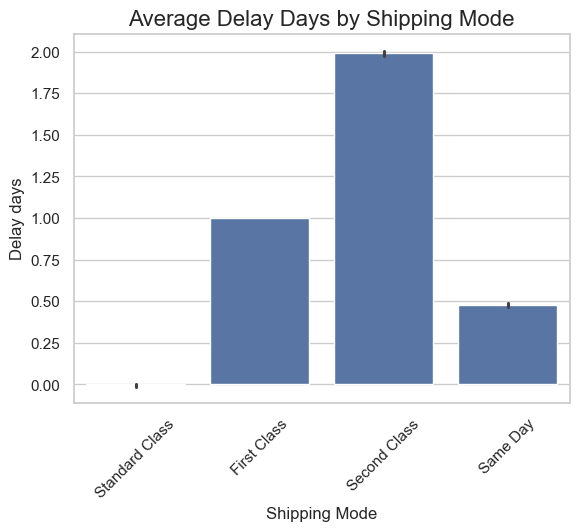

In [138]:
plt.figure()
sns.barplot(
    data = data,
    x = "Shipping Mode",
    y = "Delay days"
)
plt.xticks(rotation = 45)
plt.title("Average Delay Days by Shipping Mode", fontsize = 16)
plt.show()

Why?

Helps logistics strategy

Helps regional warehouse decisions

In [145]:
# Country-Level Delay Analysis
#Which countries are operationally weak?

data.groupby("Order Country")["Delay days"].mean().sort_values(ascending=False).head(10)

Order Country
Luxemburgo            2.70
Sudán del Sur         2.20
Bután                 2.00
República de Gambia   2.00
Eritrea               2.00
Sáhara Occidental     2.00
Suazilandia           2.00
Laos                  1.83
Eslovenia             1.83
Estonia               1.55
Name: Delay days, dtype: float64

In [140]:
# Profit vs Delivery Performance
# Are delays costing us money?

data.groupby("profit_status")["Delay days"].mean() * 100

profit_status
Loss     56.94
Profit   56.49
Name: Delay days, dtype: float64

This shows:⬇️

Whether delays correlate with losses

Where to cut costs

In [141]:
data.groupby("profit_status")["Benefit per order"].mean()

profit_status
Loss     -111.08
Profit     53.93
Name: Benefit per order, dtype: float64

In [14]:
# Category-Level Analysis
# Which categories are risky?

data.groupby("Category Name")["Late_delivery_risk"].mean().sort_values(ascending=False)

Category Name
Golf Bags & Carts      0.69
Lacrosse               0.60
Pet Supplies           0.59
Cameras                0.58
Strength Training      0.58
As Seen on  TV!        0.57
Music                  0.57
Accessories            0.57
Fitness Accessories    0.57
Books                  0.57
Women's Clothing       0.56
Boxing & MMA           0.56
Golf Gloves            0.56
Hunting & Shooting     0.56
Electronics            0.56
Crafts                 0.56
Health and Beauty      0.56
Tennis & Racquet       0.56
Garden                 0.56
Trade-In               0.56
Golf Shoes             0.56
Sporting Goods         0.55
Girls' Apparel         0.55
Basketball             0.55
Baseball & Softball    0.55
Consumer Electronics   0.55
Shop By Sport          0.55
Toys                   0.55
Cleats                 0.55
Fishing                0.55
Water Sports           0.55
Indoor/Outdoor Games   0.55
Golf Balls             0.55
Women's Apparel        0.55
Camping & Hiking       0.55
Cardio

AND ⬇️

In [16]:
# Supports inventory and vendor decisions.

data.groupby("Category Name")["Benefit per order"].mean().sort_values(ascending=False)
# Helps prioritize categories for improvement initiatives.

Category Name
Computers              157.59
Garden                  69.10
Crafts                  52.75
Cameras                 51.17
Fishing                 43.65
Children's Clothing     41.68
Sporting Goods          35.07
Music                   33.26
Camping & Hiking        31.14
Consumer Electronics    30.68
Cardio Equipment        30.67
Golf Bags & Carts       29.67
Women's Clothing        29.39
Soccer                  28.27
Women's Golf Clubs      27.78
Basketball              27.55
Health and Beauty       26.23
Golf Shoes              23.68
Kids' Golf Clubs        23.56
Water Sports            20.92
Boxing & MMA            20.43
Baseball & Softball     20.19
Cleats                  20.15
Men's Golf Clubs        19.50
Tennis & Racquet        17.52
Fitness Accessories     17.02
Women's Apparel         16.66
Indoor/Outdoor Games    16.50
Girls' Apparel          14.40
Men's Footwear          14.02
DVDs                    13.78
Hunting & Shooting      13.59
Electronics             12

In [17]:
# Monthly Demand Trend

monthly_orders = data.groupby(["order_month" , "order_year"]).size().reset_index(name = "Order Count")
monthly_orders

,order_month,order_year,Order Count
0,1,2015,5322
1,1,2016,5317
2,1,2017,5217
3,1,2018,2123
4,2,2015,4729
5,2,2016,4894
6,2,2017,4906
7,3,2015,5362
8,3,2016,5210
9,3,2017,5347


📊 Plot

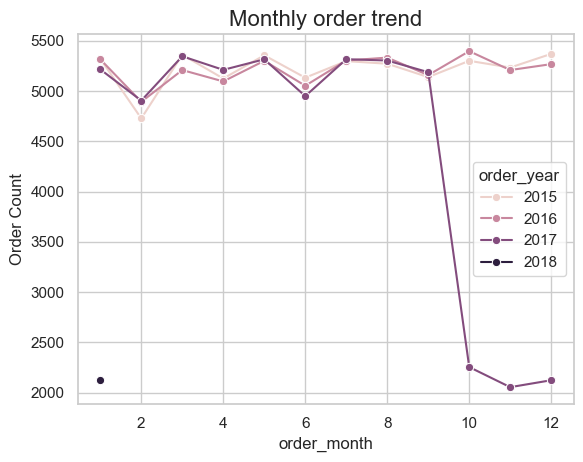

In [18]:
# Plotting monthly order trends
plt.figure()

sns.lineplot(data = monthly_orders,
             x = "order_month",
             y = "Order Count",
             marker = "o",
             hue = "order_year"
             )
plt.title("Monthly order trend", fontsize = (16))

plt.show()
